In [1]:
# All the important libraries and its functions are imported
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_files
import matplotlib.image as mpimg


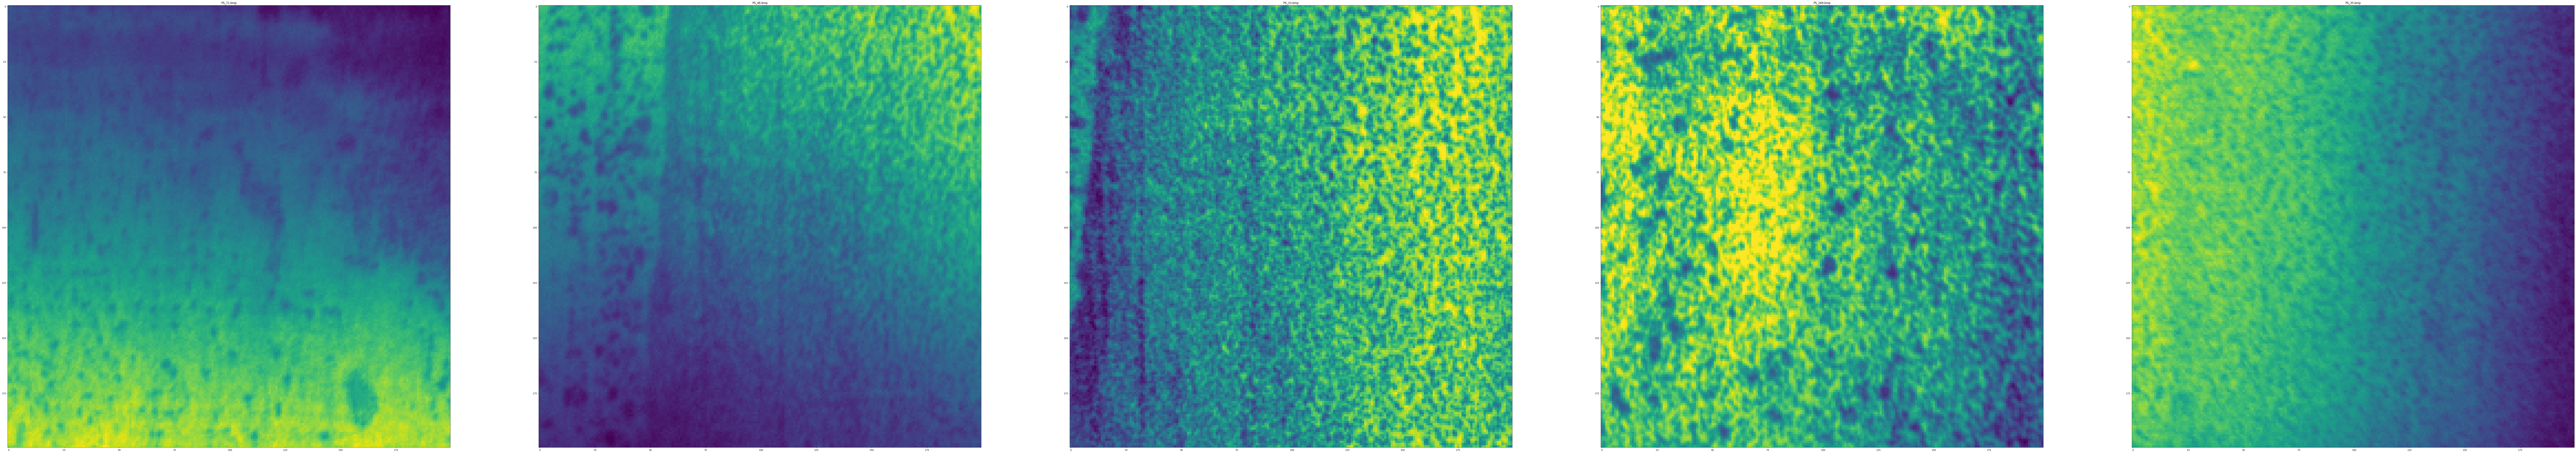

In [2]:
# Plotting and visualizing the images from the training dataset
plt.figure(figsize=(200,200))
test_folder='./NEU Metal Surface Defects Data/train/Pitted'
for i in range(5):
    file = np.random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [3]:
# Normalization of the Images with rescaling to 1./255 to make their value between 0 & 1

Train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True
)
Test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 12 using train_datagen generator
train_generator = Train_datagen.flow_from_directory(
    './NEU Metal Surface Defects Data/train',
    target_size=(200, 200),
    batch_size=12,
    class_mode='categorical'
)

# Flow validation images in batches of 12 using test_datagen generator
validation_generator = Test_datagen.flow_from_directory(
    './NEU Metal Surface Defects Data/valid',
    target_size=(200, 200),
    batch_size=12,
    class_mode='categorical'
)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [4]:
# Defining a Call back function to control training based on the Accuracy
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96 ):
            print("\nReached 96% accuracy so cancelling training!")
            self.model.stop_training = True

In [5]:
# Defining a Neural Network with different layers and Activation Function
Model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [6]:
# Compiling Model based on RMsProp Optimizer to optimize the learning 
Model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [7]:
callbacks = callback()
Accy_Store= Model.fit(train_generator,
                    batch_size=32,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[callbacks],
                    verbose=1, shuffle=True)


Epoch 1/10
138/138 [==============================] - 71s 508ms/step - loss: 1.6591 - accuracy: 0.3243 - val_loss: 1.2314 - val_accuracy: 0.5278
Epoch 2/10
138/138 [==============================] - 65s 467ms/step - loss: 1.1464 - accuracy: 0.5574 - val_loss: 0.7917 - val_accuracy: 0.7361
Epoch 3/10
138/138 [==============================] - 64s 462ms/step - loss: 0.8847 - accuracy: 0.6884 - val_loss: 0.3231 - val_accuracy: 0.9167
Epoch 4/10
138/138 [==============================] - 62s 450ms/step - loss: 0.6963 - accuracy: 0.7693 - val_loss: 0.2435 - val_accuracy: 0.9167
Epoch 5/10
138/138 [==============================] - 65s 468ms/step - loss: 0.6113 - accuracy: 0.7941 - val_loss: 0.3478 - val_accuracy: 0.9028
Epoch 6/10
138/138 [==============================] - 69s 501ms/step - loss: 0.5565 - accuracy: 0.8291 - val_loss: 0.1763 - val_accuracy: 0.9444
Epoch 7/10
138/138 [==============================] - 69s 502ms/step - loss: 0.4481 - accuracy: 0.8593 - val_loss: 0.0970 - val_ac

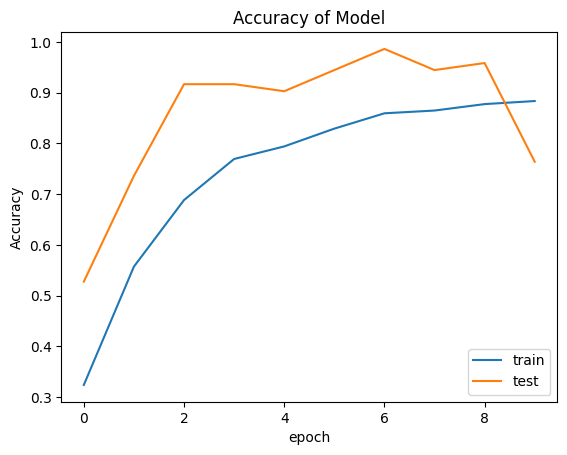

In [36]:
# Plotting the Accuracy of Model according to Epoch
 
plt.plot(Accy_Store.history['accuracy'])  
plt.plot(Accy_Store.history['val_accuracy'])  
plt.title('Accuracy of Model')  
plt.ylabel('Accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='lower right')  

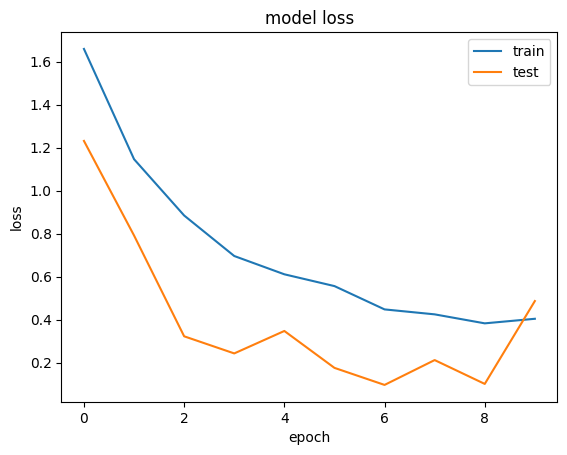

In [38]:
 # Plotting the Loss Function of Model according to Epoch 
   
plt.plot(Accy_Store.history['loss'])  
plt.plot(Accy_Store.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right')  
plt.show()

In [39]:
# Loading the file names and their respective target labels into numpy array by defining a function
test_dir = './NEU Metal Surface Defects Data/test'
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)
No_Class = len(np.unique(y_test))

In [40]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,No_Class)

In [41]:
# Loading the images and converting them into array
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
x_test = x_test.astype('float32')/255
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


3/3 [==============================] - 0s 122ms/step


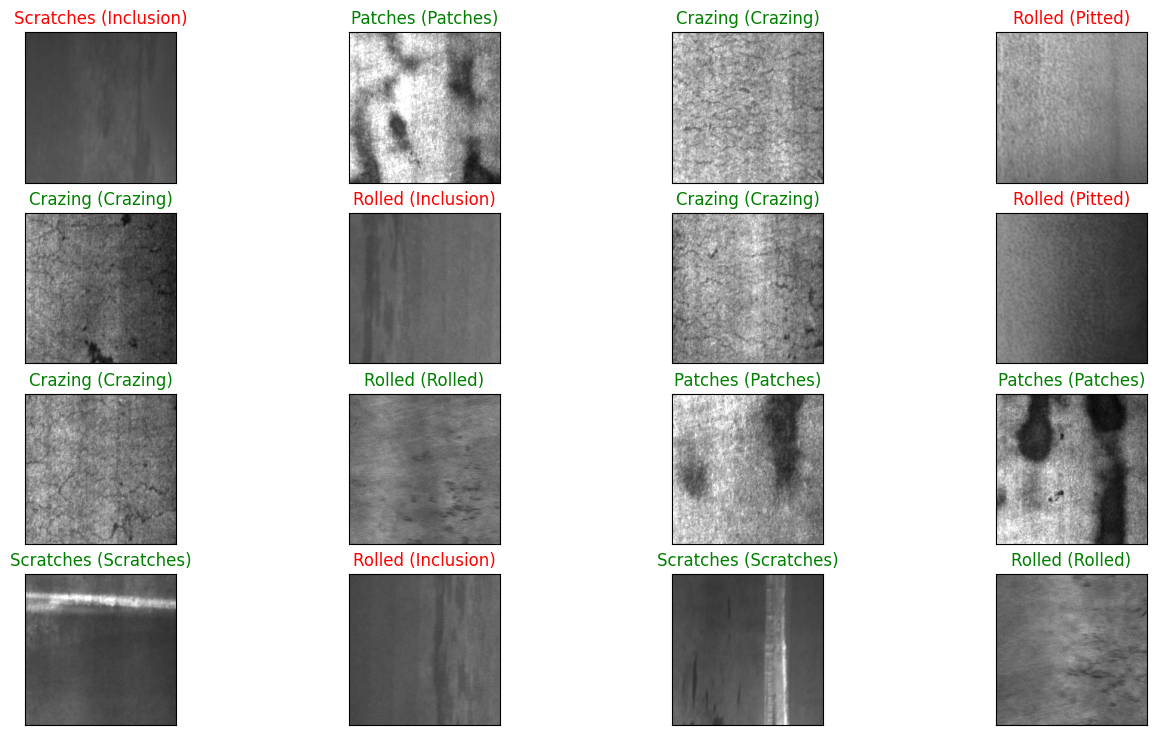

In [42]:
# Prediction on the dataset

y_pred = Model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    pred_idx = np.argmax(y_pred[index])
    true_idx = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))